In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import chess
import  numpy as np
import board_util

2024-03-13 23:48:54.658575: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 23:48:54.701170: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 23:48:54.701197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 23:48:54.702323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 23:48:54.709505: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 23:48:54.711572: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
num_possible_moves = 64  # Number of possible moves

# CNN model
model = models.Sequential([
    tf.keras.Input(shape=(12, 8, 8)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
  
    # Output layer for the entire move
    tf.keras.layers.Dense(num_possible_moves, activation='softmax', name='output_move')
])

# Compile the model with appropriate loss and metrics
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 6, 32)         2336      
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 3, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense (Dense)               (None, 64)                30784     
                                                                 
 output_move (Dense)         (None, 64)                4160      
                                                                 
Total params: 37280 (145.62 KB)
Trainable params: 37280 (145.62 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [3]:
# Read in data
file_path = "fen.txt"
data = []
with open(file_path, "r") as file:
    lines = file.readlines()

for line in lines:
    chessboard_state, move = line.split("[MOVESEP]")
    cb = chess.Board(chessboard_state)
    bb = board_util.board_to_bitboards(cb)
    ab = board_util.bitboards_to_array(bb)
   
    encoded_move = board_util.encode_move(move.strip(), ab)
    data.append((ab, encoded_move))

    

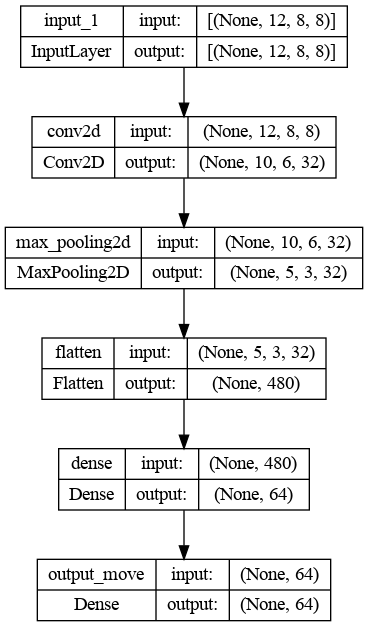

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot_output_move.png', show_shapes=True, show_layer_names=True)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import train_test_split


In [7]:


board = [item[0] for item in data]
move = [item[1] for item in data]

x_train, x_test, y_train, y_test = train_test_split(board, move, test_size=0.3, random_state=42)

# Convert lists to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Convert moves to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# No need for one-hot encoding for the moves, as they are already encoded

 


checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [8]:
epochs = 5
batch_size = 64

history = model.fit(
    x_train,
    {'output_move': y_train},
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, {'output_move': y_train}),
    callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback, reduce_lr_callback]
)

Epoch 1/5


ValueError: in user code:

    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 64) are incompatible
